In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import zscore, weibull_min
import seaborn as sns

from source.eolelib import ProcessWind
import importlib
import source.eolelib
importlib.reload(source.eolelib)
def update():
    importlib.reload(source.eolelib)

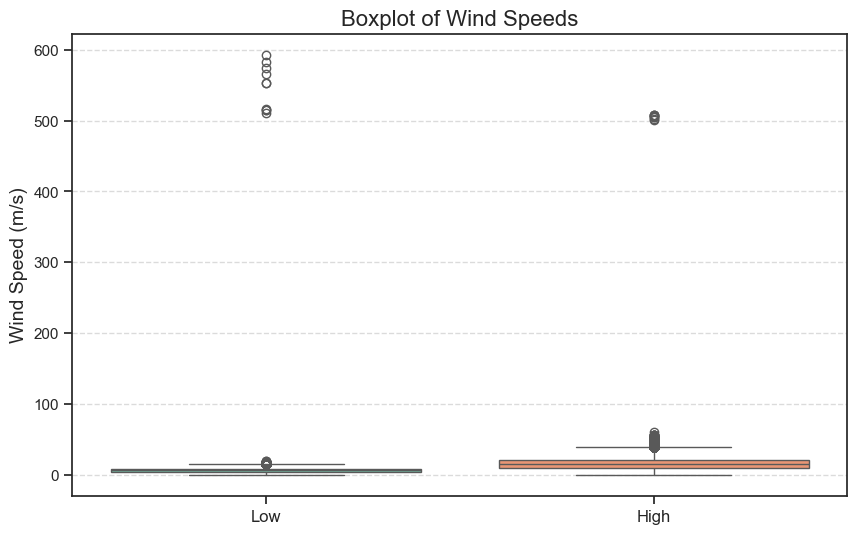

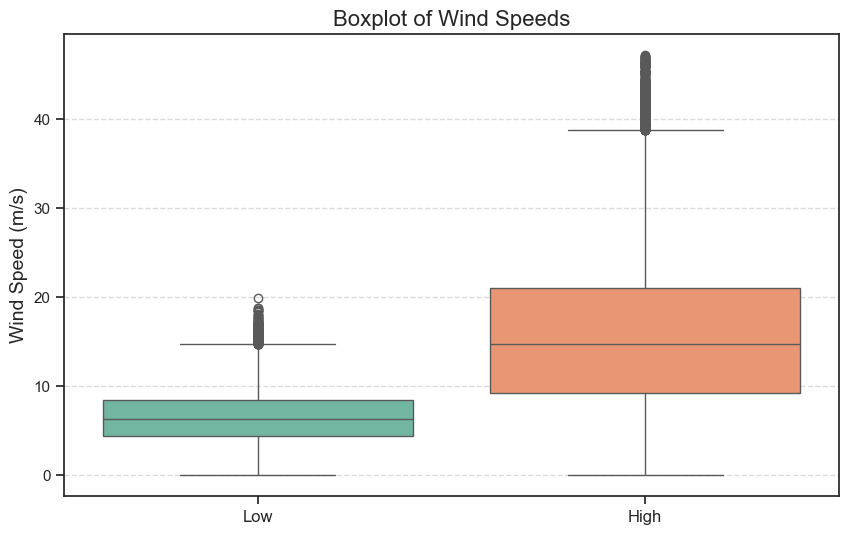

In [15]:
wind = ProcessWind(
    ["./data/wind_speed_dist_low.dat",
     "./data/wind_speed_dist_high.dat"]
)

wind.box_plot(labels=["Low", "High"], save="./figs/Boxplot_BeforeCleaning.png")

wind.clean_data()

wind.box_plot(labels=["Low", "High"], save="./figs/Boxplot_AfterCleaning.png")


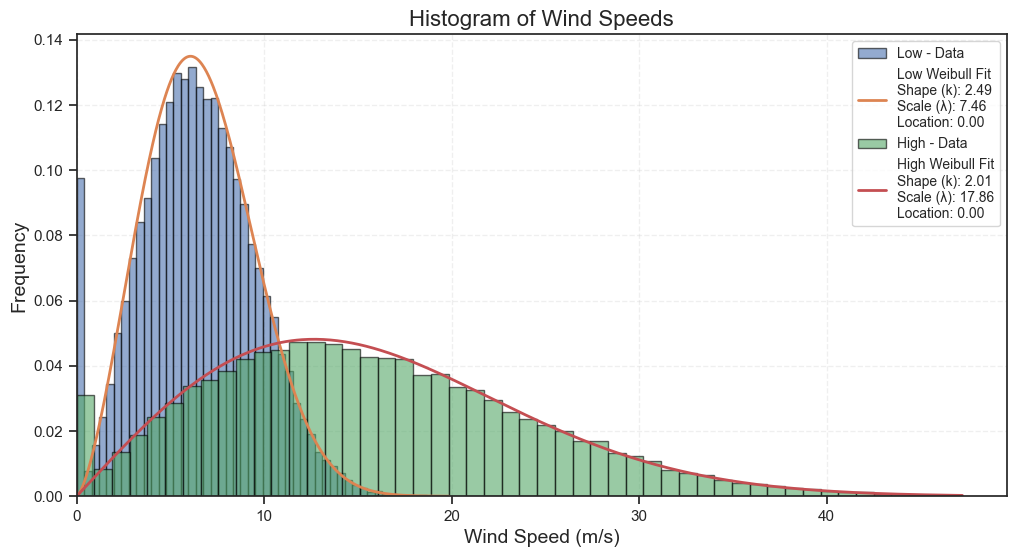

<Axes: title={'center': 'Histogram of Wind Speeds'}, xlabel='Wind Speed (m/s)', ylabel='Frequency'>

In [16]:
wind.fit_weibull()
wind.distribution(labels=["Low", "High"], bins=50, save="./figs/wind_distributions.png")

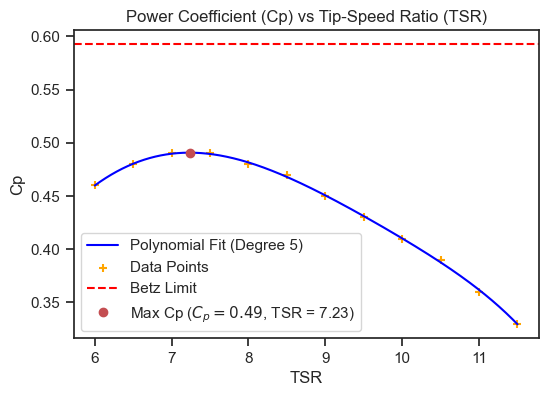

In [17]:
wind.plot_cp(latex=True, save="./figs/Cp_TSR_plot.png")

In [18]:
_ = wind.calc_performances()

C:\Users\louis\OneDrive - INSA de ROUEN Normandie\5.1_EOLE\EC3\ProjectEC3\source\eolelib.py:416: RuntimeWarning: invalid value encountered in divide
  torque = np.where(omega != 0, P / omega, 0)


Plot saved to ./figs/Performances_Single_Plot.png


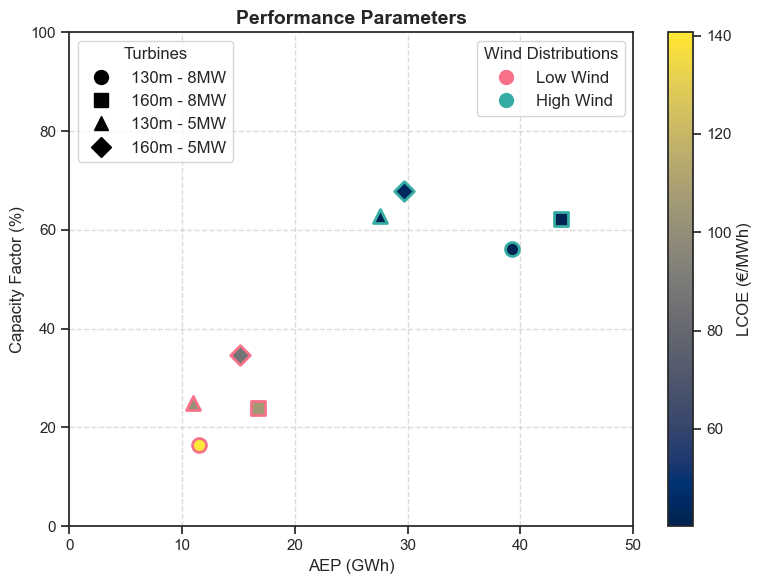

Plot saved to ./figs/Performances_Dual_Plot.png


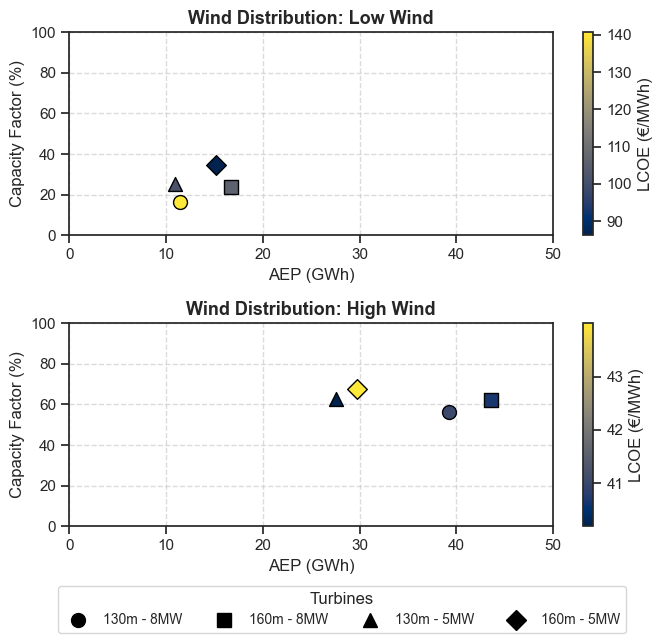

In [19]:
wind_dist_name = {
    'wind_speed_dist_low' : 'Low Wind',
    'wind_speed_dist_high' : 'High Wind',
}

turbine_name = {}
for turbine in wind.turbines:
    turbine_name[turbine.get('name')] = f"{turbine.get('rotor_diam')}m - {turbine.get('rated_power')}MW"
wind.plot_performance(turbine_names=turbine_name, wind_distribution_names=wind_dist_name, multiplot=False, cmap='cividis', save="./figs/Performances_Single_Plot.png")
wind.plot_performance(turbine_names=turbine_name, wind_distribution_names=wind_dist_name, multiplot=True, cmap='cividis', save ="./figs/Performances_Dual_Plot.png")

Plot saved to ./figs/Power_Torque_Speed_Wind_High.png


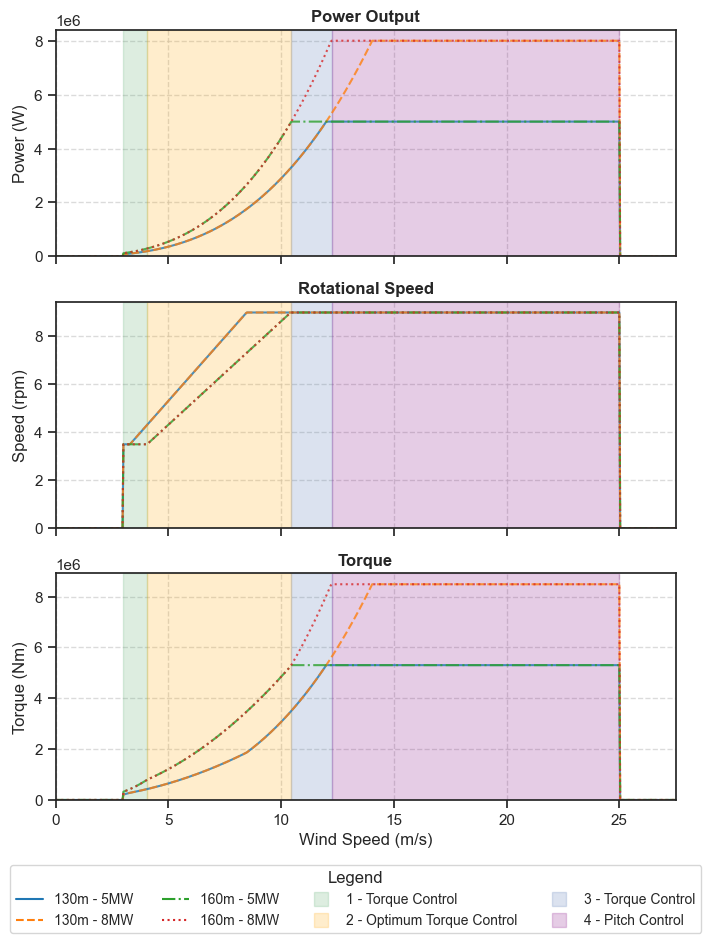

Plot saved to ./figs/Power_Torque_Speed_Wind_Low.png


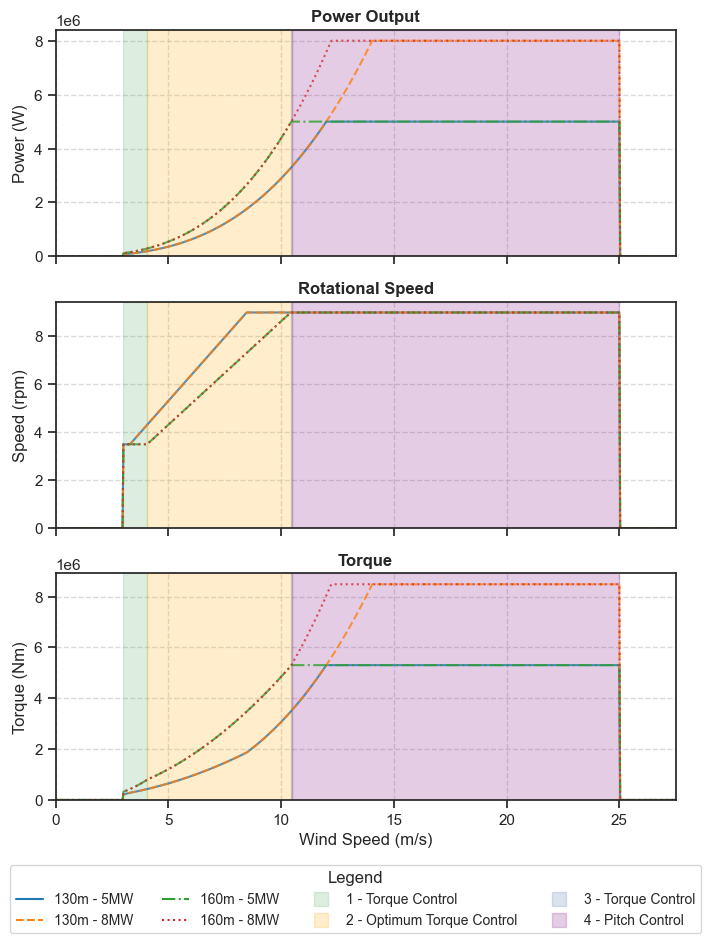

In [28]:
wind.plot_turbine_performance('wind_speed_dist_high', 
                              turbine_names=turbine_name, 
                              rectangles=wind.generate_turbine_operation_zones('Large_Rotor_Large_Gen', 'wind_speed_dist_high'),
                              wind_lim_per = 1.1,
                              save = './figs/Power_Torque_Speed_Wind_High.png')

wind.plot_turbine_performance('wind_speed_dist_low', 
                              turbine_names=turbine_name, 
                              rectangles=wind.generate_turbine_operation_zones('Large_Rotor_Small_Gen', 'wind_speed_dist_low'),
                              wind_lim_per = 1.1,
                              save = './figs/Power_Torque_Speed_Wind_Low.png')